In [414]:
import sys
import timeit
import matplotlib.pyplot as plt

# LZW

In [415]:
class LZW:
    """
    >>> lzw_encoder = LZW()
    >>> start_message = "abacabac"
    >>> dictionary, code = lzw_encoder.encode(start_message)
    >>> dictionary
    {'a': 0, 'b': 1, 'c': 2, 'ab': 3, 'ba': 4, 'ac': 5, 'ca': 6, 'aba': 7, 'ac ': 8}
    >>> code
    [0, 1, 0, 2, 3, 5]
    >>> message = lzw_encoder.decode(dictionary, code)
    >>> message
    'abacabac'
    >>> message == start_message
    True

    >>> start_message = "nasjdjsdfhj abfdh1hv h12vh 1h3 vg3g42g34v2g34v2gh34 v2g34 v4gh23vgb aasbhd asd"
    >>> dictionary, code = lzw_encoder.encode(start_message)
    >>> message = lzw_encoder.decode(dictionary, code)
    >>> message == start_message
    True

    >>> start_message = " "
    >>> dictionary, code = lzw_encoder.encode(start_message)
    >>> message = lzw_encoder.decode(dictionary, code)
    >>> message == start_message
    True

    
    """
    def __init__(self) -> None:
        pass
    def decode(self, dictionary, code):
        message = ""
        for integer in code:
            message += list(dictionary.keys())[integer]
        return message
        
    def find_line(self, message, dictionary):
        for index in range(1, len(message) + 1):
            if message[:index] ==  message[:index+1] or len(message) == 1:
                return message[:index] + " "
            if message[:index] in dictionary and message[:index+1] not in dictionary:
                return message[:index+1]
            
    def init_dictionary(self, message):
        return {letter:index for index, letter in enumerate("".join(sorted(set(message))))}

    def encode(self, message):
        dictionary = self.init_dictionary(message)
        pos_cursor = 0
        code = []
        while True:
            line = self.find_line(message[pos_cursor:] , dictionary)
            if line is None:
                break
            code.append(dictionary[line[:-1]])
            dictionary[line] = len(dictionary)
            pos_cursor += len(line) - 1
        return dictionary, code

47.81%
Time taken to encode book 1: 0.00 seconds, Number of Symbols: 1492
Time taken to encode book 2: 0.00 seconds, Number of Symbols: 2544
Time taken to encode book 3: 0.00 seconds, Number of Symbols: 3483
Time taken to encode book 4: 0.00 seconds, Number of Symbols: 4387
Time taken to encode book 5: 0.01 seconds, Number of Symbols: 5244
Time taken to encode book 6: 0.01 seconds, Number of Symbols: 6082
Time taken to encode book 7: 0.01 seconds, Number of Symbols: 6916
Time taken to encode book 8: 0.01 seconds, Number of Symbols: 7718
Time taken to encode book 9: 0.01 seconds, Number of Symbols: 8514
Time taken to encode book 10: 0.02 seconds, Number of Symbols: 9273
Time taken to encode book 11: 0.02 seconds, Number of Symbols: 10015
Time taken to encode book 12: 0.02 seconds, Number of Symbols: 10749
Time taken to encode book 13: 0.02 seconds, Number of Symbols: 11461
Time taken to encode book 14: 0.02 seconds, Number of Symbols: 12176
Time taken to encode book 15: 0.03 seconds, Nu

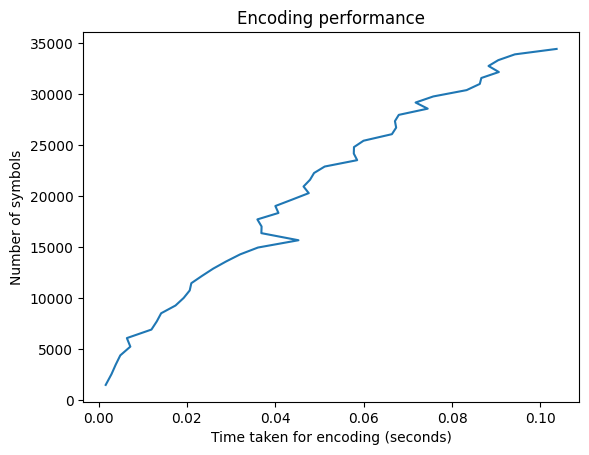

In [416]:
with open("book.txt") as my_file:
    book = my_file.read()
    lzw_encoder = LZW()
    dictionary, code = lzw_encoder.encode(book)
    coded = len(code)+ len(dictionary)
    coefficient = str(100 - (round((coded*100)/len(book),2)))+"%"
    print(coefficient)

    def encode_book(size):
        start_time = timeit.default_timer()
        dictionary, code = lzw_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times = []
    symbols = []

    for i in range(1, 50):
        time_taken, num_symbols = encode_book(i/50)
        times.append(time_taken)
        symbols.append(num_symbols)
        print(f"Time taken to encode book {i}: {time_taken:.2f} seconds, Number of Symbols: {num_symbols}")

    plt.plot(times, symbols)
    plt.xlabel('Time taken for encoding (seconds)')
    plt.ylabel('Number of symbols')
    plt.title('Encoding performance')
    plt.show()


Ступінь стиснення 47,81% можна вважати помірним стисненням. Він не дуже високий і не дуже низький. Це свідчить про те, що алгоритм LZW зміг знайти закономірності та надмірності у вихідних даних і представити їх більш ефективним способом. Фактичний коефіцієнт стиснення, досягнутий алгоритмом LZW, залежить від характеру даних, що стискаються, а також від реалізації алгоритму.

# HUFFMAN

In [417]:
class Huffman_Encoder:
    """
    >>> huffman_encoder = Huffman_Encoder()
    >>> huffman_encoder.encode_probabilities([0.4,0.18,0.1, 0.1, 0.07, 0.06, 0.05, 0.04])
    [(0.4, '1'), (0.18, '001'), (0.1, '011'), (0.1, '0000'),\
 (0.07, '0100'), (0.06, '0101'), (0.05, '00010'), (0.04, '00011')]
    >>> huffman_encoder.encode("text test 7342734y72y347 dbhfs dbfhbsdhf ")
    '100110111100000110011000101000001001101000101011000110100010101110011011001110100\
0101001100011010101100000000010010000110101011000010000010110010101000000000010001'
    >>> huffman_encoder.decode('1001101111000001100110001010000010011010001010\
11000110100010101110011011001110100010100110001101010110000000001001000011\
0101011000010000010110010101000000000010001')
    'text test 7342734y72y347 dbhfs dbfhbsdhf '


    """
    def __init__(self) -> None:
        self.codes = []

    def find_probabilities(self, text):
        probabilities = {}
        for char in text:
            if char not in probabilities:
                probabilities[char] = 0
            probabilities[char] += 1

        return [num/len(text) for num in probabilities.values()], [key for key in probabilities]

    def encode_with_codes(self, text):
        coded = ""
        key_list = list(self.codes.keys())
        val_list = list(self.codes.values())
        for element in text:
            coded += key_list[val_list.index(element)]
        return coded

    def encode(self, text):
        probabilities, alphabet = self.find_probabilities(text)
        codes = self.encode_probabilities(probabilities)
        self.codes = {element[0][1]:element[1] for element in list(zip(codes, alphabet))}

        return self.encode_with_codes(text)

    def encode_probabilities(self, probabilities):
        """ Encodes alphabet based on probabilies """
        probabilities = sorted(probabilities, reverse=True)
        if len(probabilities) == 2:
            return [(probabilities[0], "0"), (probabilities[1], "1")]

        num1 = probabilities.pop()
        num2 = probabilities.pop()

        codes = self.encode_probabilities(probabilities + [num1 + num2])
        find_first =  next((element for element in codes if element[0] == num1+num2), None)

        codes.append((num2, find_first[1] + "0"))
        codes.append((num1, find_first[1] + "1"))
        codes.remove(find_first)

        return codes

    def decode(self, code):
        i_1 = 0
        i_2 = 0
        decoded_text = ""
        while i_2 != len(code):
            i_2 += 1
            if code[i_1:i_2] in self.codes:
                decoded_text += self.codes[code[i_1:i_2]]
                i_1 = i_2
        return decoded_text

34.63%
Time taken to encode book 1: 0.00 seconds, Number of Symbols: 24409
Time taken to encode book 2: 0.00 seconds, Number of Symbols: 31134
Time taken to encode book 3: 0.00 seconds, Number of Symbols: 37964
Time taken to encode book 4: 0.00 seconds, Number of Symbols: 44785
Time taken to encode book 5: 0.01 seconds, Number of Symbols: 51792
Time taken to encode book 6: 0.01 seconds, Number of Symbols: 58635
Time taken to encode book 7: 0.01 seconds, Number of Symbols: 65513
Time taken to encode book 8: 0.01 seconds, Number of Symbols: 72241
Time taken to encode book 9: 0.01 seconds, Number of Symbols: 79534
Time taken to encode book 10: 0.01 seconds, Number of Symbols: 87693
Time taken to encode book 11: 0.01 seconds, Number of Symbols: 93246
Time taken to encode book 12: 0.01 seconds, Number of Symbols: 100019
Time taken to encode book 13: 0.01 seconds, Number of Symbols: 106817
Time taken to encode book 14: 0.01 seconds, Number of Symbols: 115486
Time taken to encode book 15: 0.0

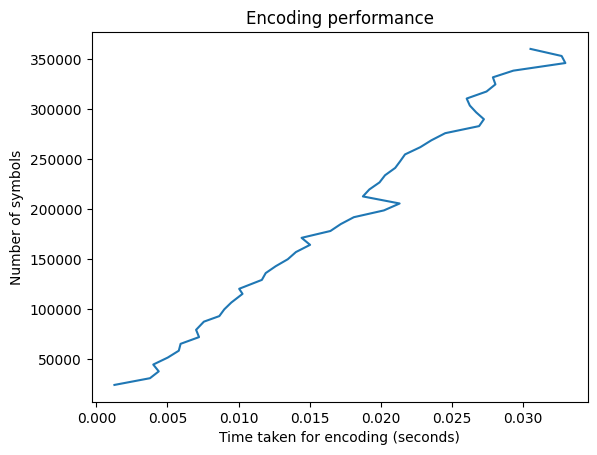

In [418]:
with open("book.txt") as my_file:
    book = my_file.read()
    huffman_encoder = Huffman_Encoder()
    coded = len(huffman_encoder.encode(book))
    coefficient = str(round(100 - ((coded*100)/(len(book)*8)),2))+"%"
    print(coefficient)

    def encode_book(size):
        start_time = timeit.default_timer()
        dictionary = huffman_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times = []
    symbols = []

    for i in range(1, 50):
        time_taken, num_symbols = encode_book(i/50)
        times.append(time_taken)
        symbols.append(num_symbols)
        print(f"Time taken to encode book {i}: {time_taken:.2f} seconds, Number of Symbols: {num_symbols}")

    plt.plot(times, symbols)
    plt.xlabel('Time taken for encoding (seconds)')
    plt.ylabel('Number of symbols')
    plt.title('Encoding performance')
    plt.show()

Коефіцієнт стиснення 34,63% можна вважати хорошим або поганим залежно від характеру даних, що стискаються, і конкретних цілей процесу стиснення. Для деяких типів даних, таких як текстові файли або зображення з багатьма повторюваними шаблонами, коефіцієнт стиснення 34,63% можна вважати досить високим. Для інших типів даних, наприклад високорандомізованих даних або вже стиснутих форматів даних, коефіцієнт стиснення 34,63% можна вважати низьким.

In [419]:
class LZ77:
    """
    >>> lz_77_encoder = LZ77(5)
    >>> encoded = lz_77_encoder.encode("abacabacdbacacacd")
    >>> print(encoded)
    [(0, 0, 'a'), (0, 0, 'b'), (2, 1, 'c'), (4, 4, 'd'), (4, 3, 'a'), (2, 3, 'd')]
    >>> print(lz_77_encoder.decode(encoded))
    abacabacdbacacacd
    >>> encoded = lz_77_encoder.encode("abababababababbabababba")
    >>> print(encoded)
    [(0, 0, 'a'), (0, 0, 'b'), (2, 12, 'b'), (5, 4, 'a'), (4, 1, 'b'), (5, 1, '')]
    >>> print(lz_77_encoder.decode(encoded))
    abababababababbabababba
    >>> encoded = lz_77_encoder.encode("")
    >>> print(encoded)
    []
    >>> print(lz_77_encoder.decode(encoded))
    <BLANKLINE>
    """
    def __init__(self, buffer) -> None:
        self.buffer_len = buffer

    def decode(self, decoded):
        message = ""
        for code in decoded:
            if code[0] == 0:
                message += code[2]
                continue
            r = code[1]%code[0]
            c = code[1] // code[0]
            add_message = message[-code[0]:] * c + message[-code[0]: -code[0] + r]
            message += add_message + code[2]
        return message

    def longest_match(self ,buffer, message):
        max_step = 0
        max_start = 0


        start = 0
        step = 0
        for index, letter_buf in enumerate(buffer):
            if letter_buf == message[0]:
                start = len(buffer) - index
                step = 1
                for index_message, letter in enumerate(message[1:]):
                    if not letter == buffer[(index_message + 1)%start + index]:
                        break
                    step += 1
                if max_step < step:
                    max_step = step
                    max_start = start

        return (0, 0) if not max_step else (max_start, max_step)

    def encode(self, message):
        pos_cursor = 0
        buffer = ""
        encoded = []
        while pos_cursor != len(message):

            start, steps = self.longest_match(buffer, message[pos_cursor:])
            buffer += message[pos_cursor: pos_cursor + steps + 1]
            buffer = buffer[-self.buffer_len:]
            if (pos_cursor + steps) >= len(message):
                encoded.append((start, steps, ""))
                break
            encoded.append((start, steps, message[pos_cursor + steps]))
            pos_cursor += steps + 1
        return encoded

Time taken to encode book 1: 0.00 seconds, Number of Symbols: 18313
Time taken to encode book 2: 0.00 seconds, Number of Symbols: 19187
Time taken to encode book 3: 0.01 seconds, Number of Symbols: 20069
Time taken to encode book 4: 0.01 seconds, Number of Symbols: 20980
Time taken to encode book 5: 0.01 seconds, Number of Symbols: 21879
Time taken to encode book 6: 0.01 seconds, Number of Symbols: 22745
Time taken to encode book 7: 0.02 seconds, Number of Symbols: 23638
Time taken to encode book 8: 0.03 seconds, Number of Symbols: 24515
Time taken to encode book 9: 0.03 seconds, Number of Symbols: 25395
Time taken to encode book 10: 0.03 seconds, Number of Symbols: 26287
Time taken to encode book 11: 0.04 seconds, Number of Symbols: 27167
Time taken to encode book 12: 0.04 seconds, Number of Symbols: 28047
Time taken to encode book 13: 0.05 seconds, Number of Symbols: 28907
Time taken to encode book 14: 0.05 seconds, Number of Symbols: 29808
Time taken to encode book 15: 0.06 seconds,

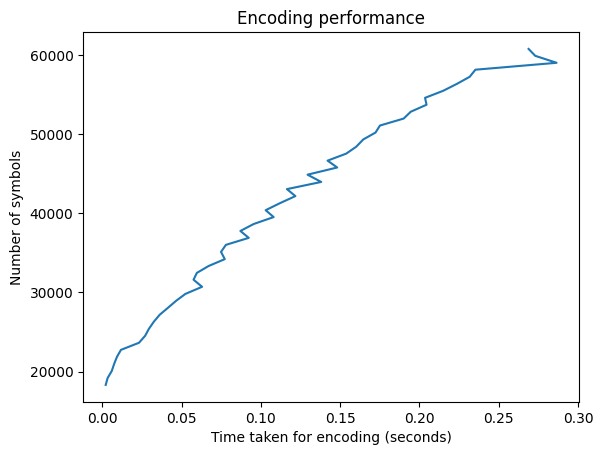

In [420]:
with open("book.txt") as my_file:
    book = my_file.read()
    lz77_encoder = LZ77(10)
    coded = len(lz77_encoder.encode(book))

    def encode_book(size):
        start_time = timeit.default_timer()
        dictionary = lz77_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times = []
    symbols = []

    for i in range(1, 50):
        time_taken, num_symbols = encode_book(i/50)
        times.append(time_taken)
        symbols.append(num_symbols)
        print(f"Time taken to encode book {i}: {time_taken:.2f} seconds, Number of Symbols: {num_symbols}")

    plt.plot(times, symbols)
    plt.xlabel('Time taken for encoding (seconds)')
    plt.ylabel('Number of symbols')
    plt.title('Encoding performance')
    plt.show()

In [421]:
lz_77 = LZ77(5000)

with open("book.txt", "r", encoding="utf-8") as file:
    text = file.readlines()
    code = lz_77.encode("".join(text))
    len(code)*6
    coeff = 100 - (((100 * len(code)*3))/len("".join(text)))
    print(coeff)

-7.00602652868956


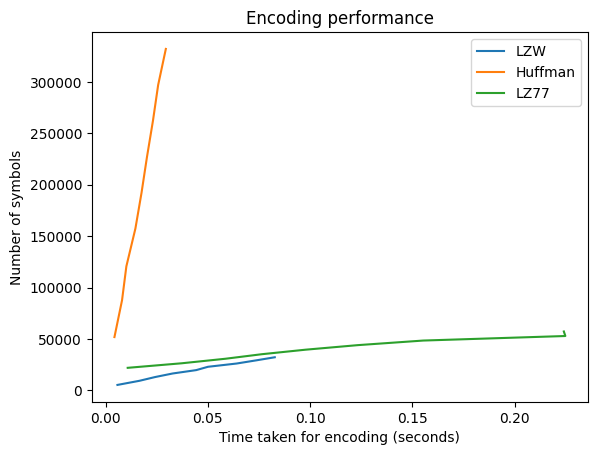

In [422]:
with open("book.txt") as my_file:
    book = my_file.read()
    lzw_encoder = LZW()
    dictionary, code = lzw_encoder.encode(book)
    coded = len(code) + len(dictionary)
    coefficient_lzw = str(100 - (round((coded*100)/len(book),2)))+"%"

    def encode_book_lzw(size):
        start_time = timeit.default_timer()
        dictionary, code = lzw_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times_lzw = []
    symbols_lzw = []

    for i in range(1, 10):
        time_taken, num_symbols = encode_book_lzw(i/10)
        times_lzw.append(time_taken)
        symbols_lzw.append(num_symbols)

with open("book.txt") as my_file:
    book = my_file.read()
    huffman_encoder = Huffman_Encoder()
    coded = len(huffman_encoder.encode(book))
    coefficient_huffman = str(round(100 - ((coded*100)/(len(book)*8)),2))+"%"

    def encode_book_huffman(size):
        start_time = timeit.default_timer()
        dictionary = huffman_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times_huffman = []
    symbols_huffman = []

    for i in range(1, 10):
        time_taken, num_symbols = encode_book_huffman(i/10)
        times_huffman.append(time_taken)
        symbols_huffman.append(num_symbols)

    with open("book.txt") as my_file:
        book = my_file.read()
        lz77_encoder = LZ77(10)
        coded = len(lz77_encoder.encode(book))

        def encode_book(size):
            start_time = timeit.default_timer()
            dictionary = lz77_encoder.encode(book[:int(len(book)*size)])
            elapsed_time = timeit.default_timer() - start_time
            num_symbols = len(dictionary) + len(code)
            return elapsed_time, num_symbols

        times_lz77 = []
        symbols_lz77 = []

        for i in range(1, 10):
            time_taken, num_symbols = encode_book(i/10)
            times_lz77.append(time_taken)
            symbols_lz77.append(num_symbols)

plt.plot(times_lzw, symbols_lzw, label='LZW')
plt.plot(times_huffman, symbols_huffman, label='Huffman')
plt.plot(times_lz77, symbols_lz77, label='LZ77')
plt.xlabel('Time taken for encoding (seconds)')
plt.ylabel('Number of symbols')
plt.title('Encoding performance')
plt.legend()
plt.show()

З цього графіку можна зробити висновок, що алгоритм Гаффмана працює найефективніше.

# DEFLATE

In [423]:
class Deflate_Encoder:
    """
    >>> deflate_encoder = Deflate_Encoder(5)
    >>> code = deflate_encoder.encode(" q, ()82rkwyy gq4")
    >>> deflate_encoder.decode(code)
    ' q, ()82rkwyy gq4'
    """
    def __init__(self, buffer) -> None:
        self.haffman_encoder = Huffman_Encoder()
        self.lz77_encoder = LZ77(buffer)

    def encode(self, text):
        # print(text)
        coded = repr(self.lz77_encoder.encode(text))\
        .replace(", ", ",,").replace("),,(", ",,")[2:-2]
        # print(coded)
        return self.haffman_encoder.encode(coded)

    def divide_in_three(self, list_divide):
        index = 0
        while index < len(list_divide):
            yield [int(list_divide[index]),
                 int(list_divide[index + 1]), list_divide[index + 2][1:-1]]
            index += 3

    def decode(self, code):
        decoded = self.haffman_encoder.decode(code)
        codes = list(self.divide_in_three(decoded.split(",,")))
        return self.lz77_encoder.decode(codes)

-552.26%


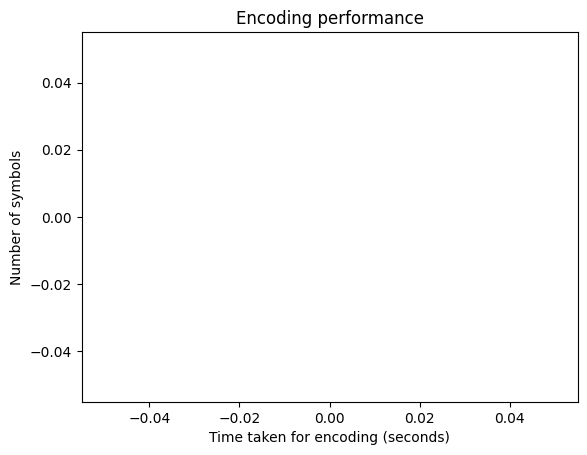

In [424]:
with open("book.txt") as my_file:
    book = my_file.read()
    deflate_encoder = Deflate_Encoder(5000)
    coded = len(deflate_encoder.encode(book))
    coefficient = str(round(100 - ((coded*100)/(len(book))),2))+"%"
    print(coefficient)

    def encode_book(size):
        start_time = timeit.default_timer()
        dictionary = deflate_encoder.encode(book[:int(len(book)*size)])
        elapsed_time = timeit.default_timer() - start_time
        num_symbols = len(dictionary) + len(code)
        return elapsed_time, num_symbols

    times = []
    symbols = []

    for i in range(1, 0):
        time_taken, num_symbols = encode_book(i/50)
        times.append(time_taken)
        symbols.append(num_symbols)
        print(f"Time taken to encode book {i}: {time_taken:.2f} seconds, Number of Symbols: {num_symbols}")

    plt.plot(times, symbols)
    plt.xlabel('Time taken for encoding (seconds)')
    plt.ylabel('Number of symbols')
    plt.title('Encoding performance')
    plt.show()